### LOAN APPLICATION STATUS PREDICTION

In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.iterrows

<bound method DataFrame.iterrows of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849      

In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

CORRELATION HEATMAP

In [11]:
corr=df.corr()
corr.shape

(5, 5)

In [12]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


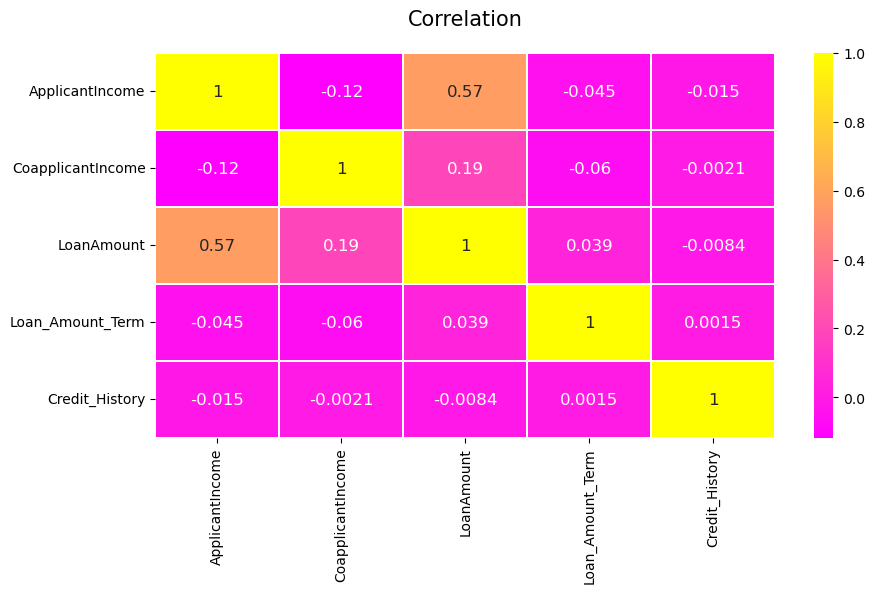

In [13]:
def correlation_heatmap(df):
    ax=plt.subplots(figsize=(10,5))
    colormap=sns.diverging_palette(220,10, as_cmap=True)
    ax=sns.heatmap(df.corr(),cmap="spring",annot=True, linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Correlation', y=1.05, size=15)
correlation_heatmap(df)

In [14]:
x_data=df.drop('LoanAmount', axis='columns')
y_data=df['LoanAmount']

In [15]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:xlabel='Education', ylabel='count'>

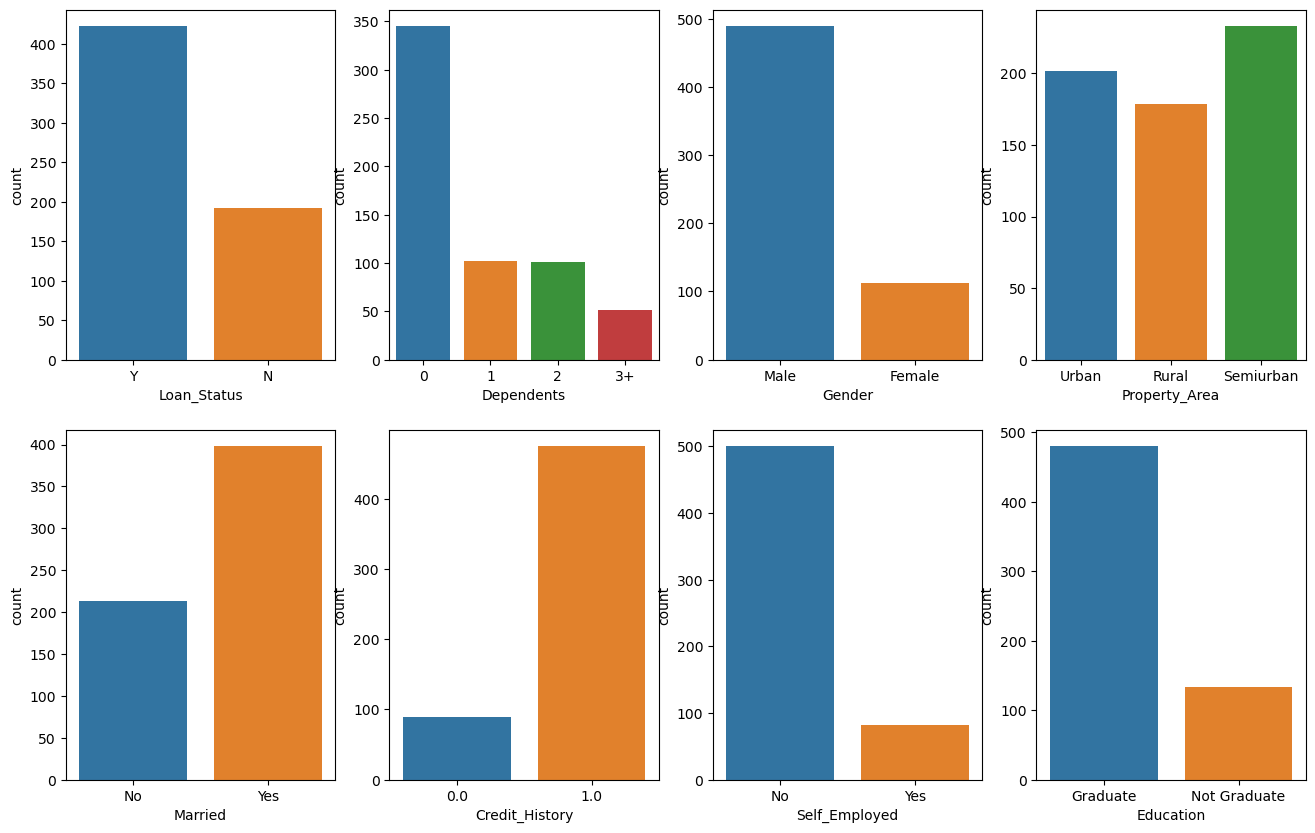

In [16]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=df,ax=ax[0][0])
sns.countplot('Dependents',data=df,ax=ax[0][1])
sns.countplot('Gender',data=df,ax=ax[0][2])
sns.countplot('Property_Area',data=df,ax=ax[0][3])
sns.countplot('Married',data=df,ax=ax[1][0])
sns.countplot('Credit_History',data=df,ax=ax[1][1])
sns.countplot('Self_Employed',data=df,ax=ax[1][2])
sns.countplot('Education',data=df,ax=ax[1][3])

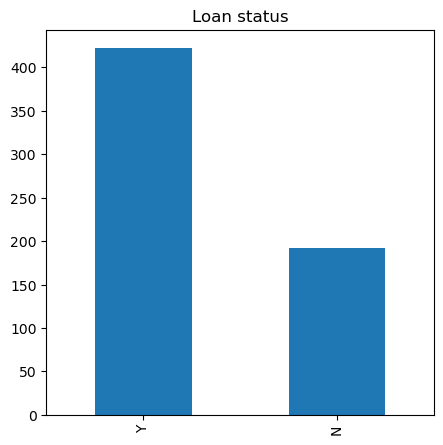

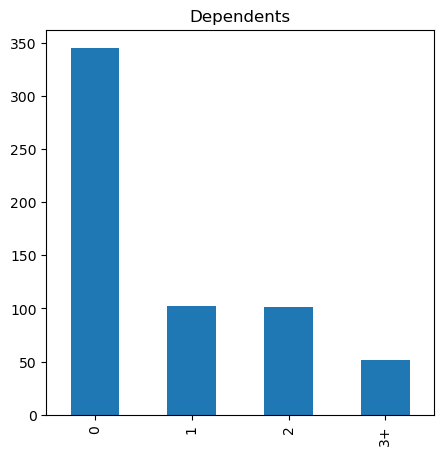

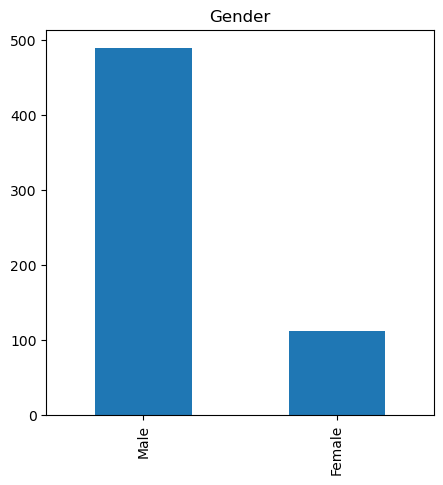

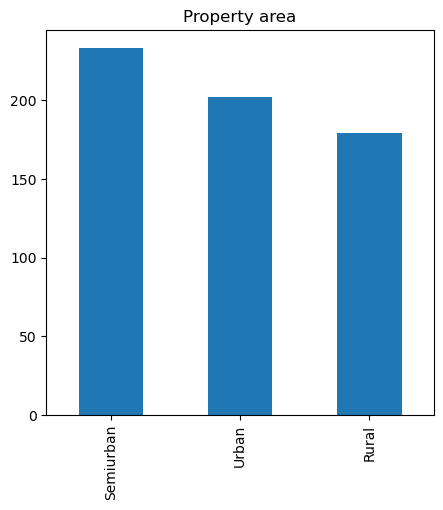

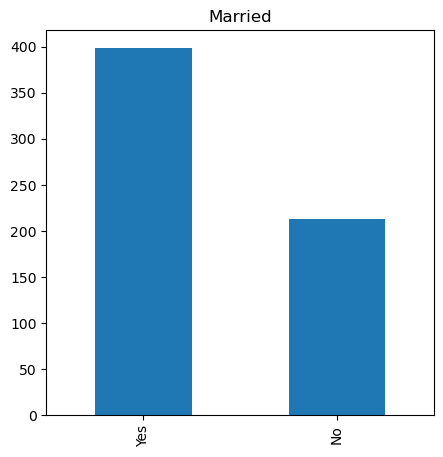

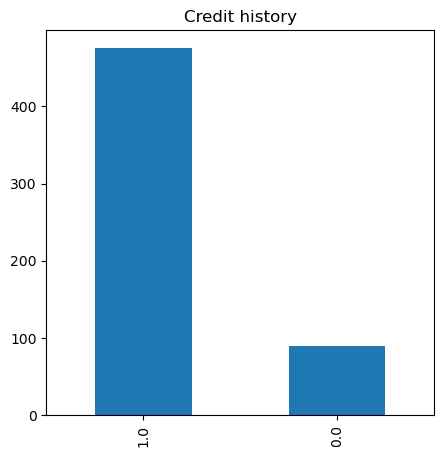

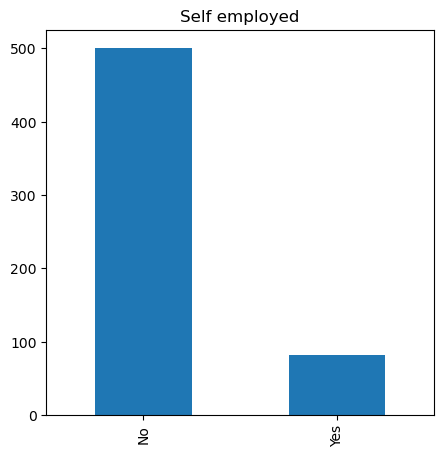

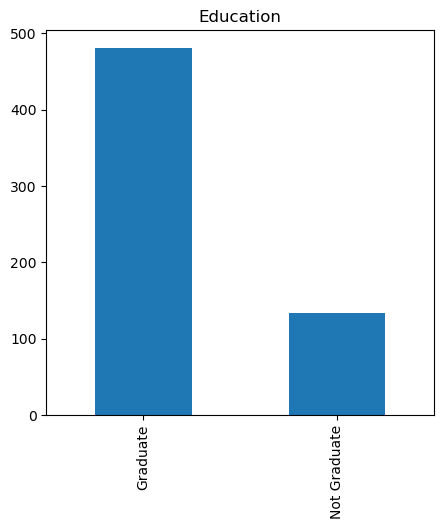

In [17]:
df['Loan_Status'].value_counts().plot(kind='bar',title='Loan status',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Dependents'].value_counts().plot(kind='bar',title='Dependents',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Gender'].value_counts().plot(kind='bar',title='Gender',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Property_Area'].value_counts().plot(kind='bar',title='Property area',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Married'].value_counts().plot(kind='bar',title='Married',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Credit_History'].value_counts().plot(kind='bar',title='Credit history',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Self_Employed'].value_counts().plot(kind='bar',title='Self employed',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

df['Education'].value_counts().plot(kind='bar',title='Education',figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

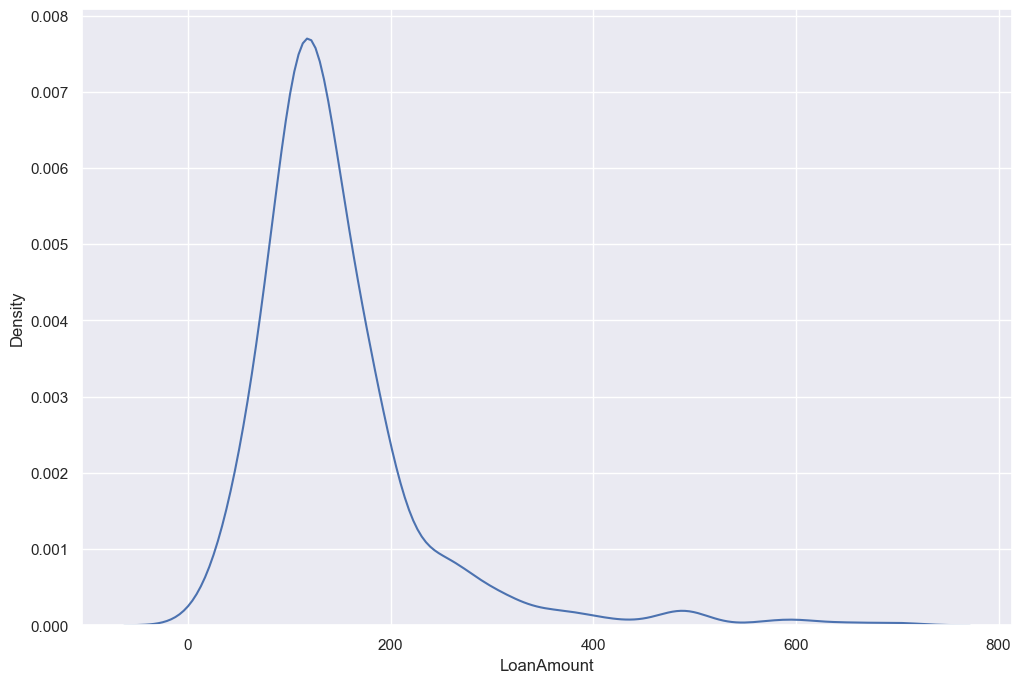

In [18]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.kdeplot(y_data)

<AxesSubplot:ylabel='LoanAmount'>

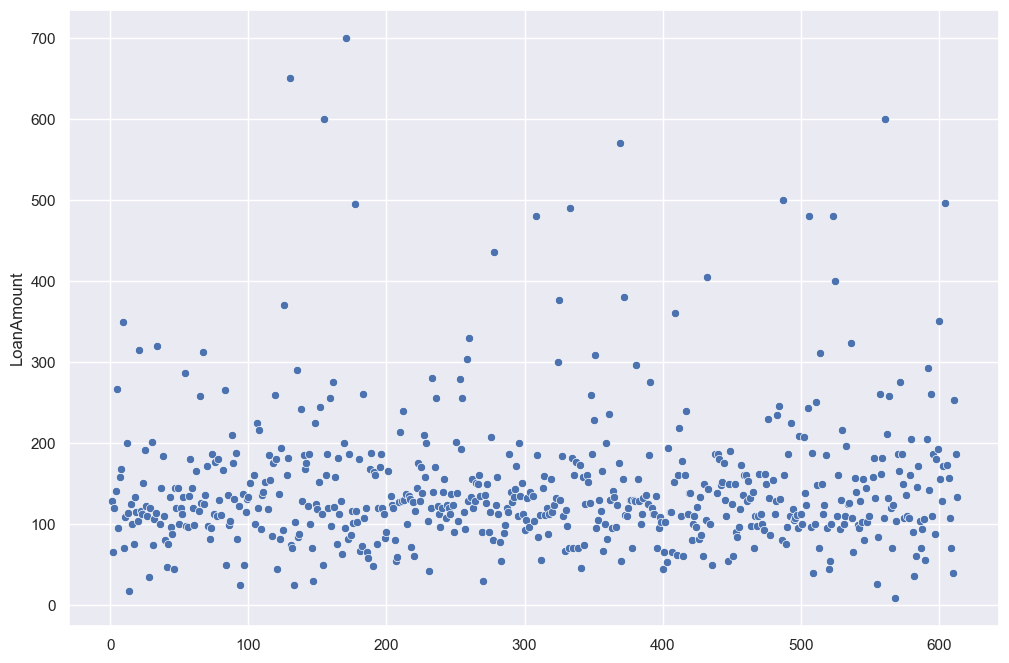

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=y_data)

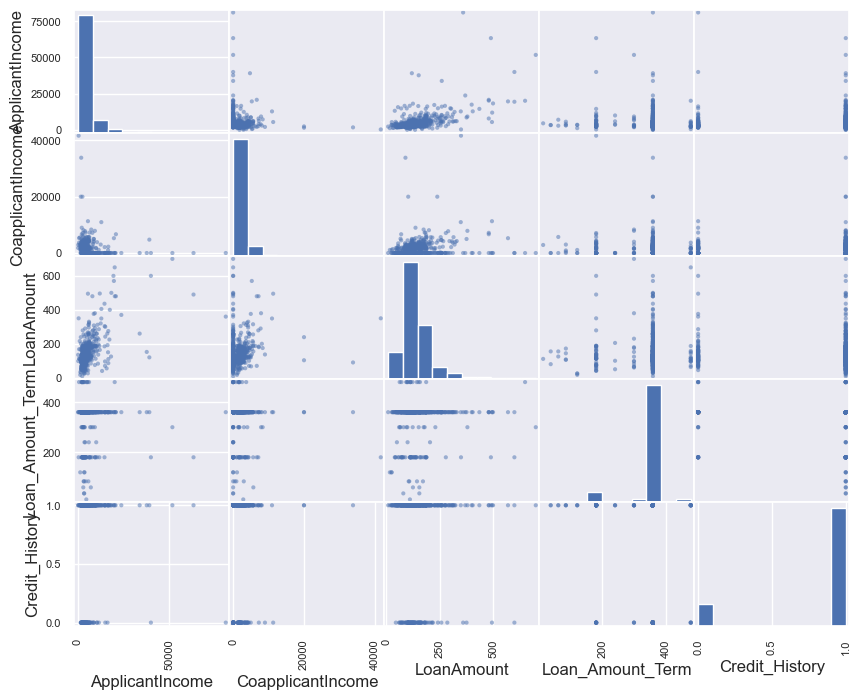

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,8),color='b')
plt.show()

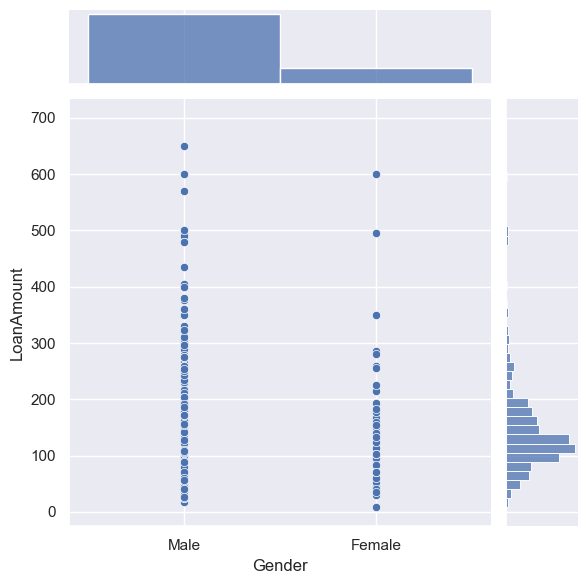

In [21]:
sns.jointplot(x='Gender', y='LoanAmount', data=df)
plt.show()

<AxesSubplot:>

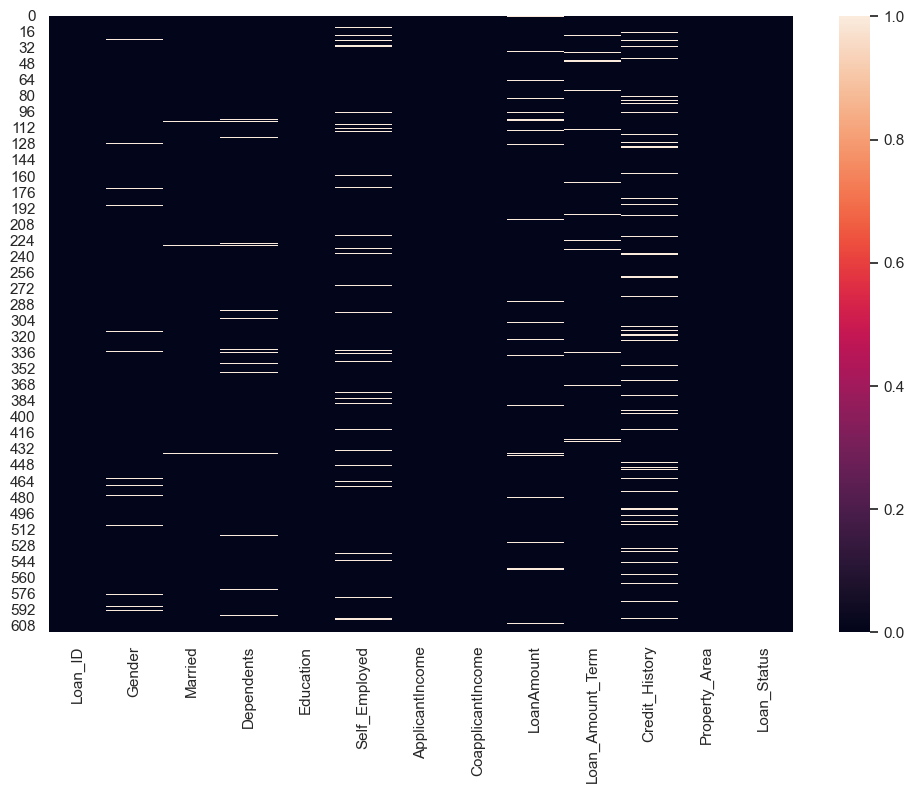

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

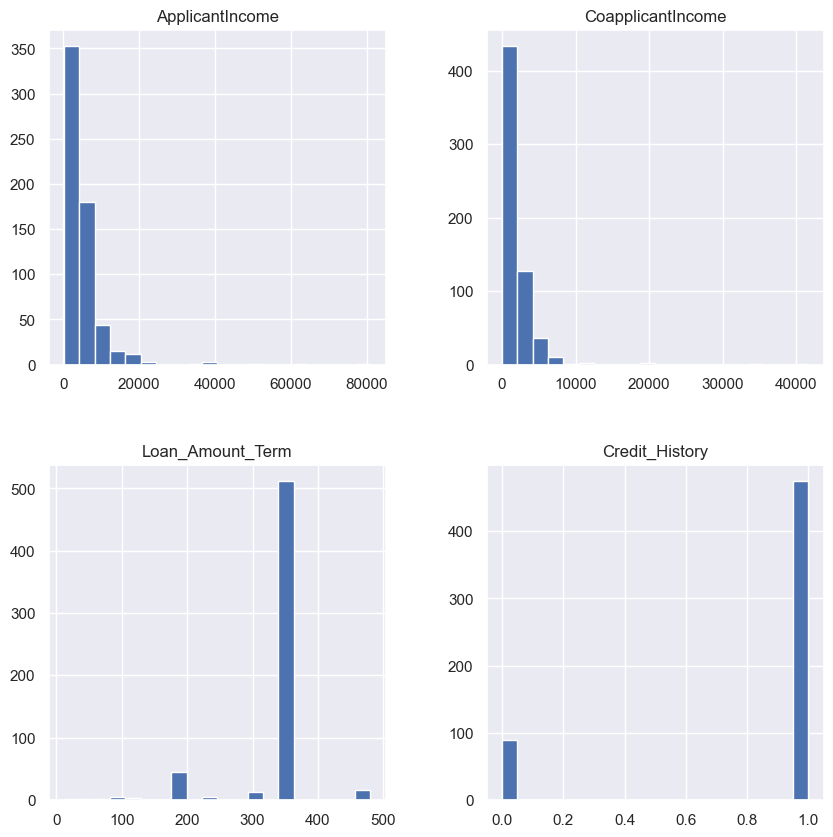

In [23]:
x_data.hist(figsize=(10,10), bins=20, legend=False)
plt.show()

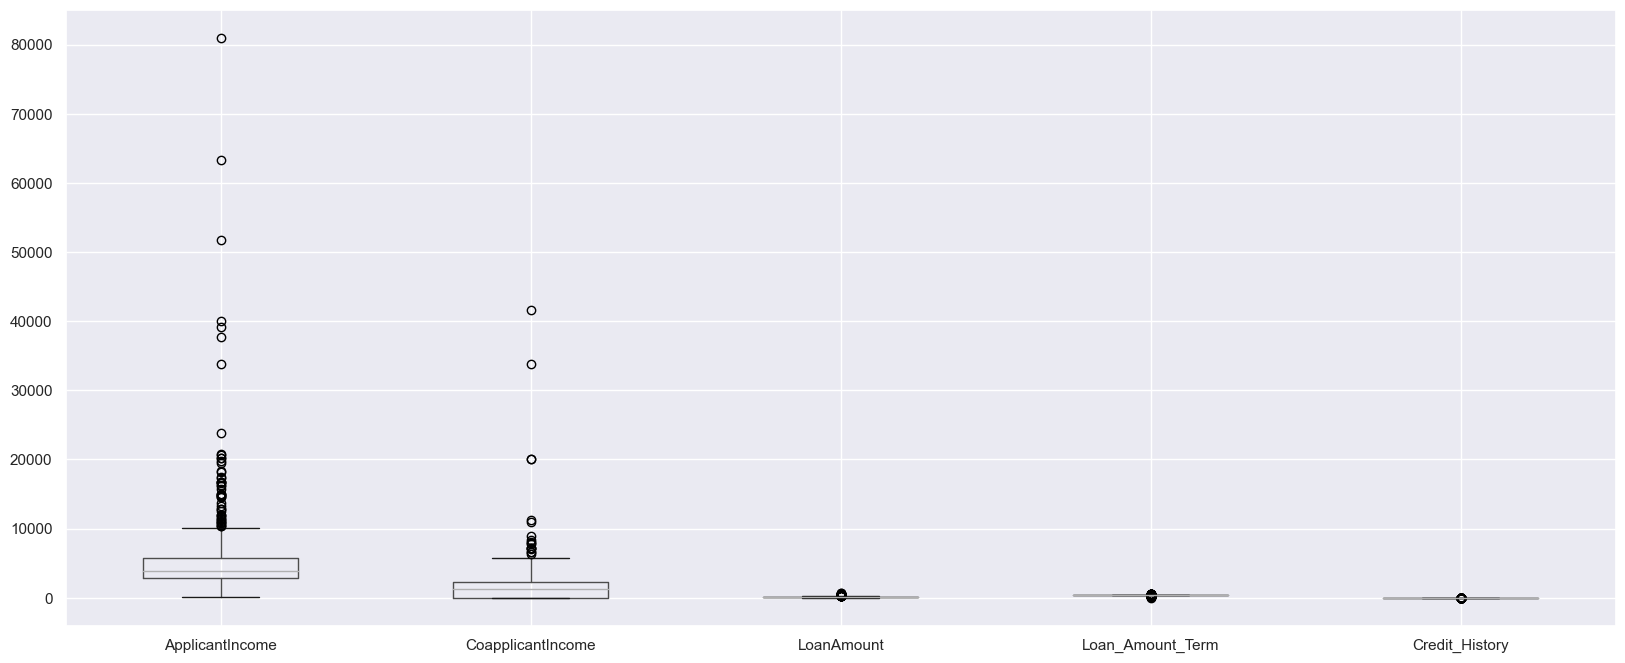

In [24]:
plt.figure(figsize=(20,8))
df.boxplot();

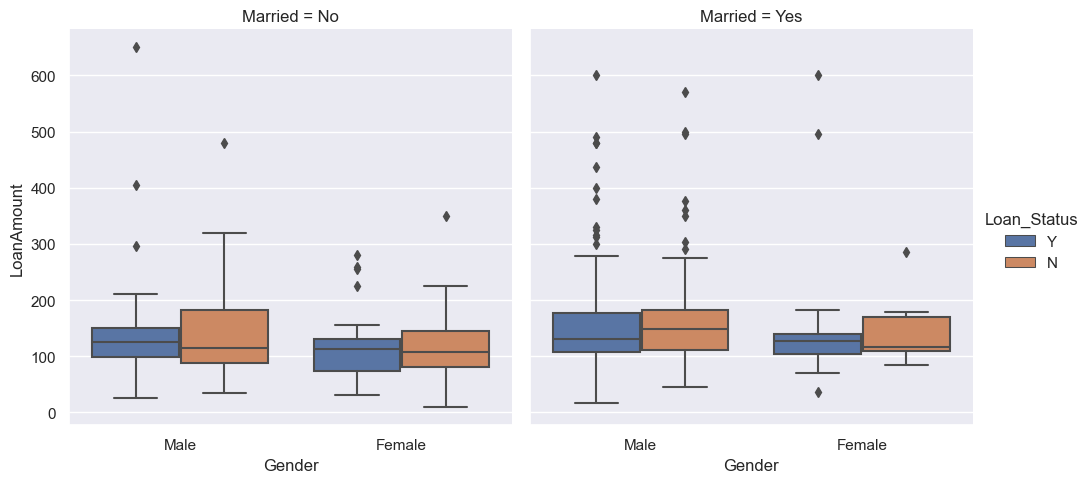

In [25]:
sns.catplot(x='Gender' , y='LoanAmount', data=df,kind='box',hue='Loan_Status',col='Married');

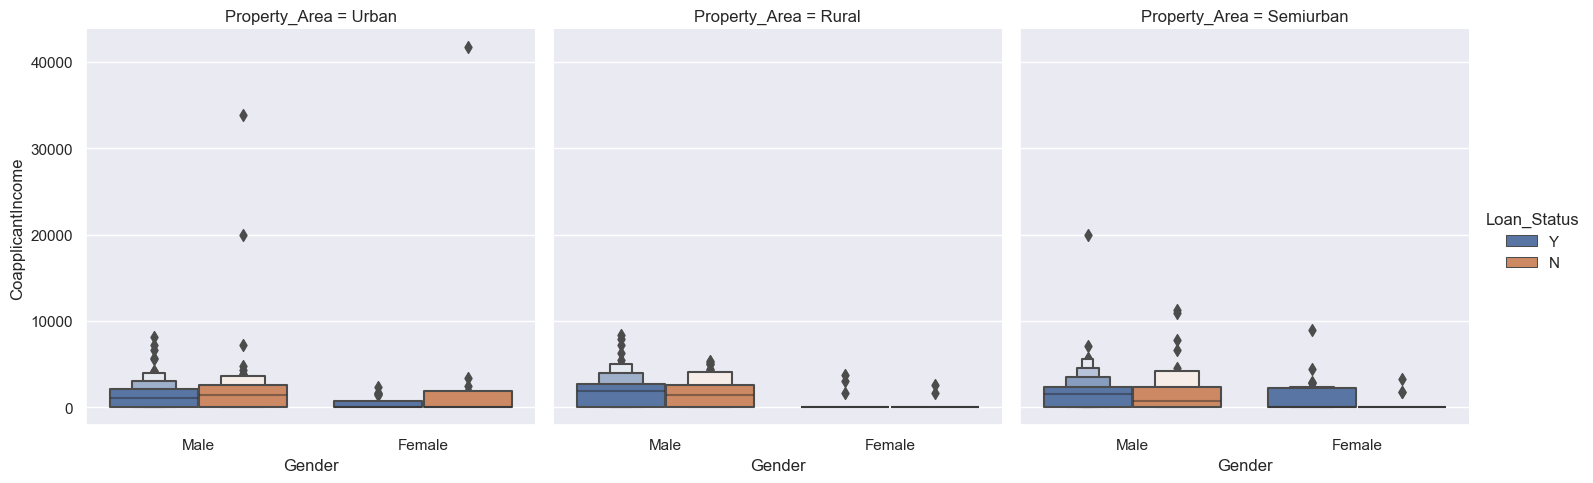

In [26]:
sns.catplot(x='Gender' , y='CoapplicantIncome', data=df,kind='boxen',hue='Loan_Status',col='Property_Area');

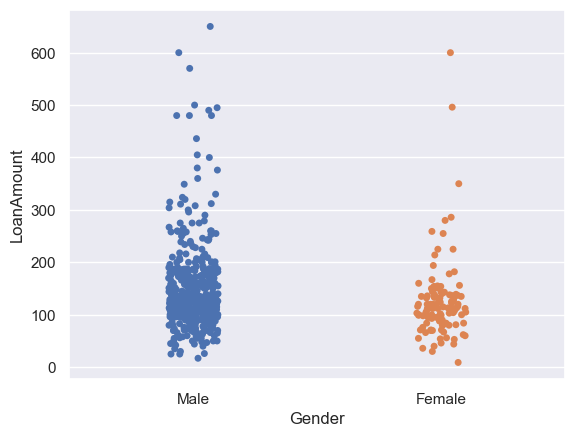

In [27]:
sns.stripplot(x='Gender', y='LoanAmount', data=df);
plt.show()

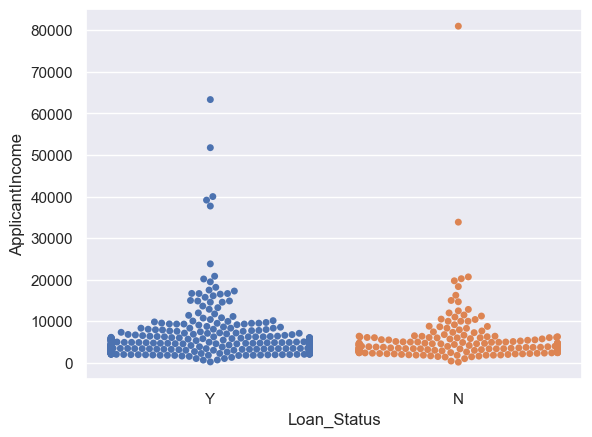

In [28]:
sns.swarmplot(x='Loan_Status',y='ApplicantIncome' , data=df);
plt.show()

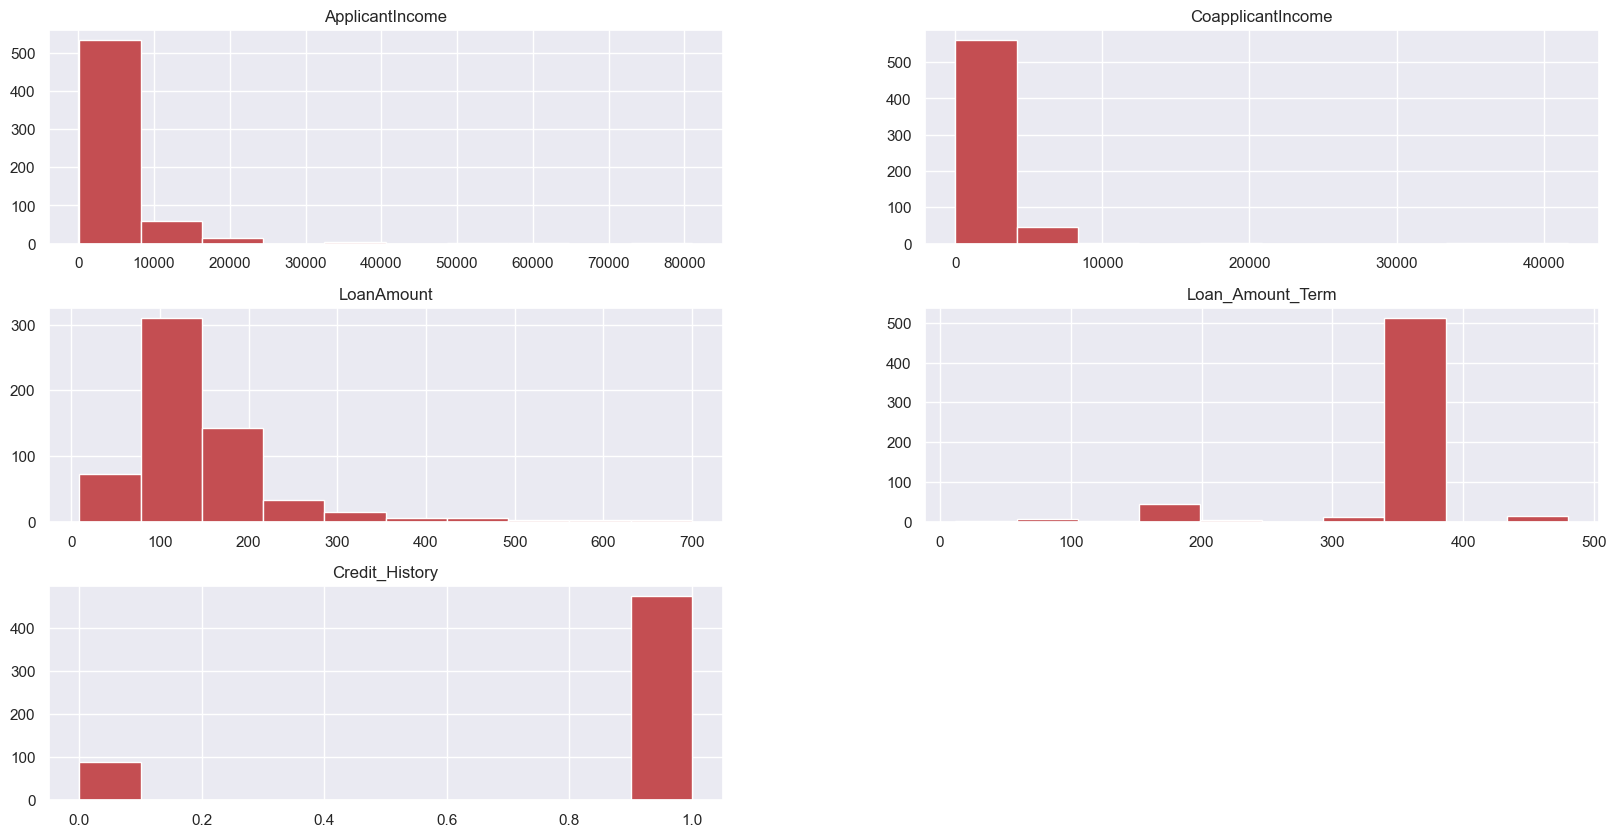

In [29]:
df.hist(color='r',figsize=(20,10))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

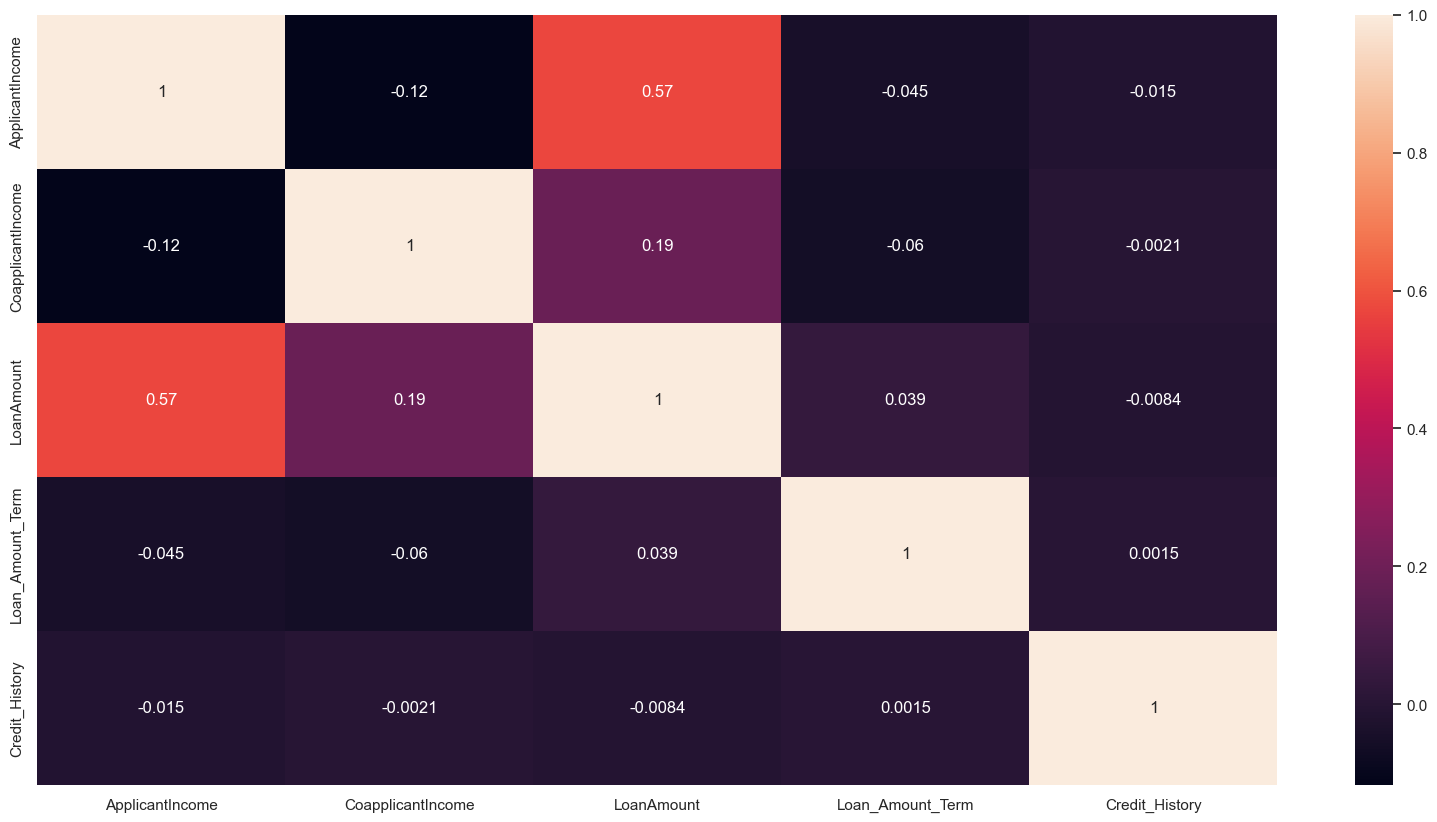

In [30]:
plt.figure(figsize=(20,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show

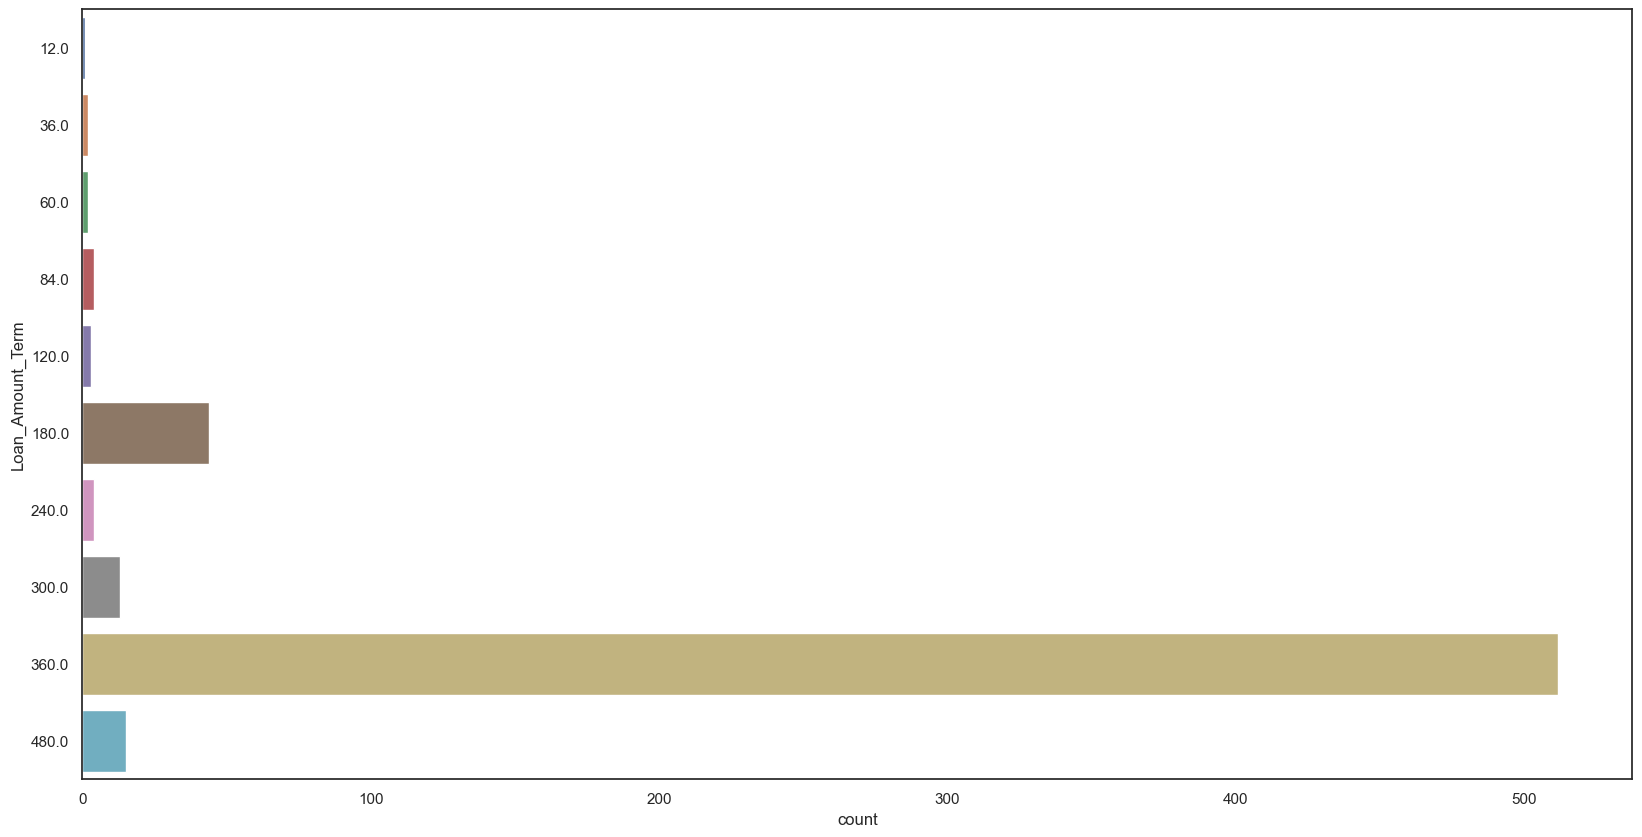

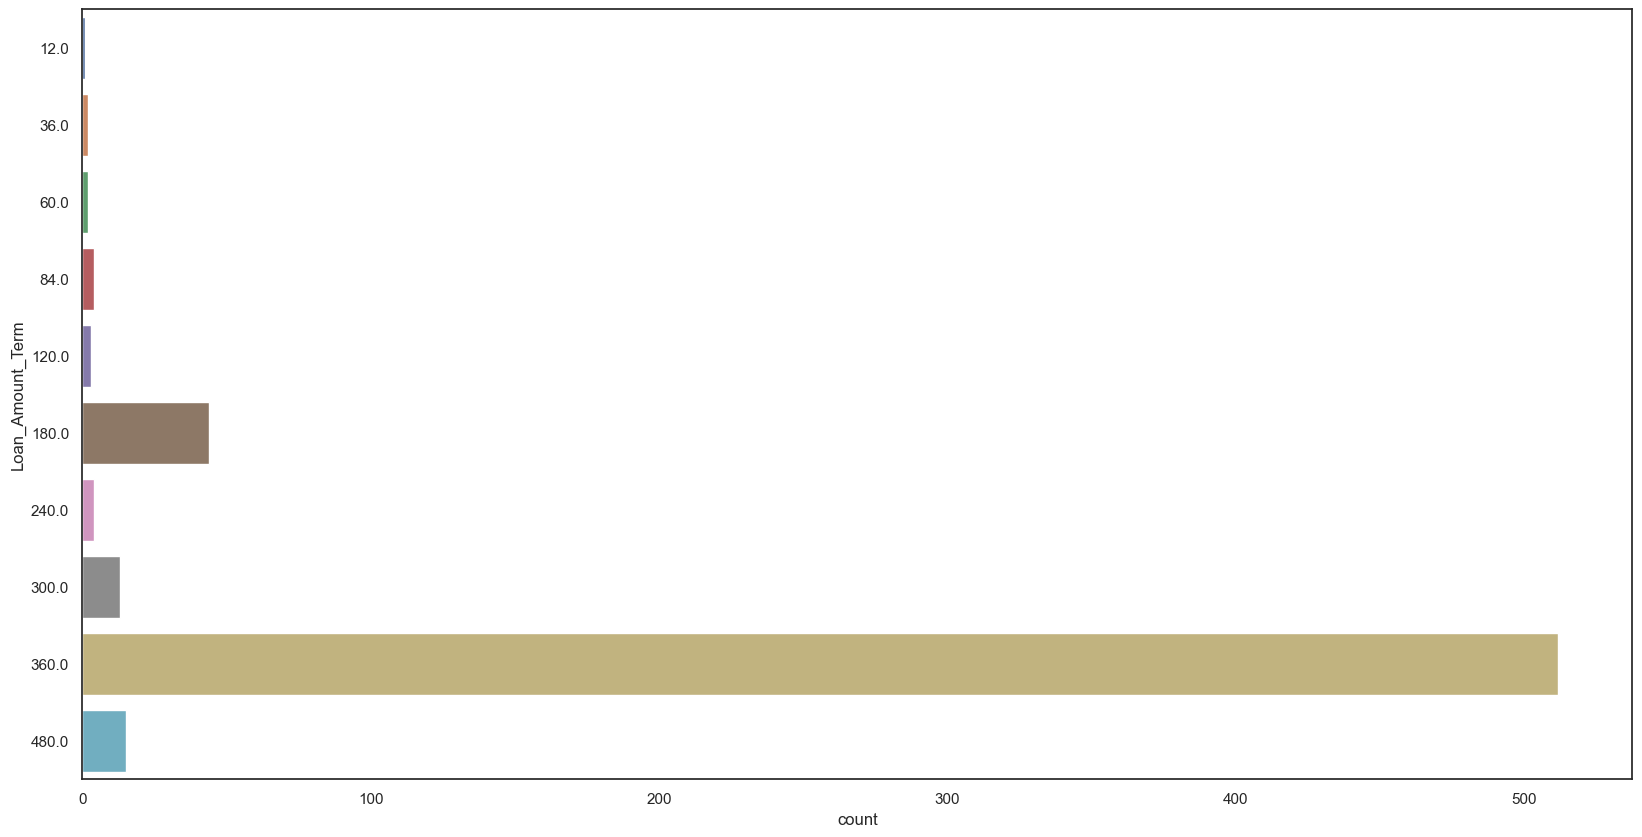

In [31]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10))
sns.countplot(y="Loan_Amount_Term",data=df);plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10))
sns.countplot(y="Loan_Amount_Term",data=df);

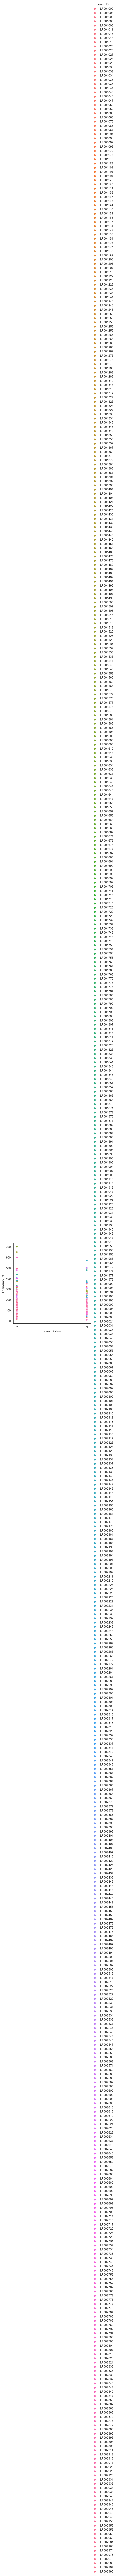

In [32]:
sns.relplot(x='Loan_Status' , y='LoanAmount' , hue='Loan_ID' , data=df);

<AxesSubplot:>

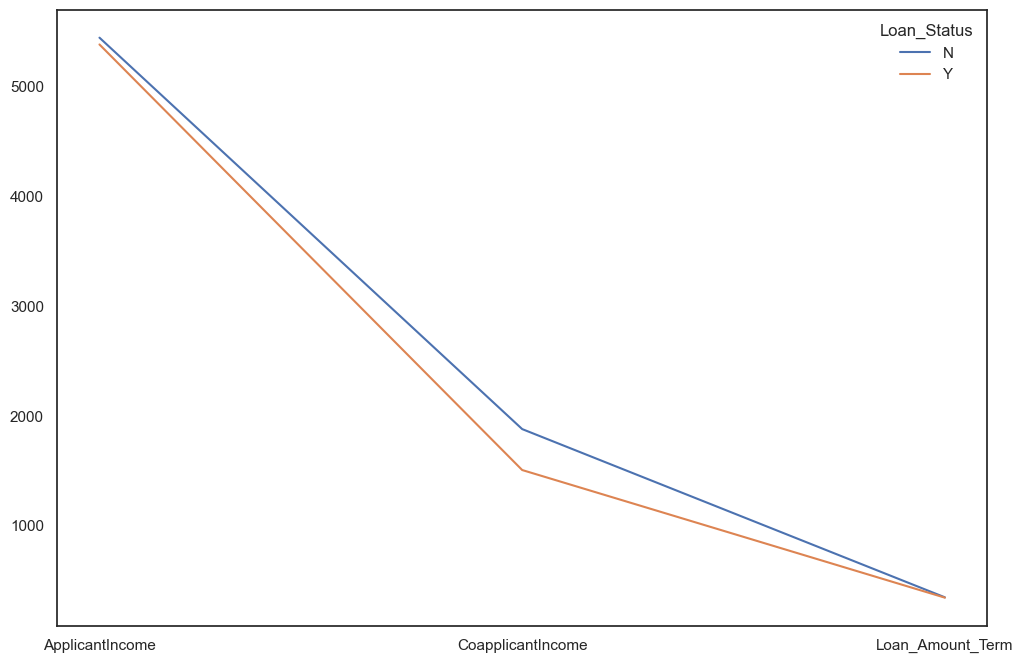

In [33]:
df.groupby('Loan_Status')[['ApplicantIncome' , 'CoapplicantIncome' , 'Loan_Amount_Term']].mean().T.plot(figsize=(12,8))

<AxesSubplot:>

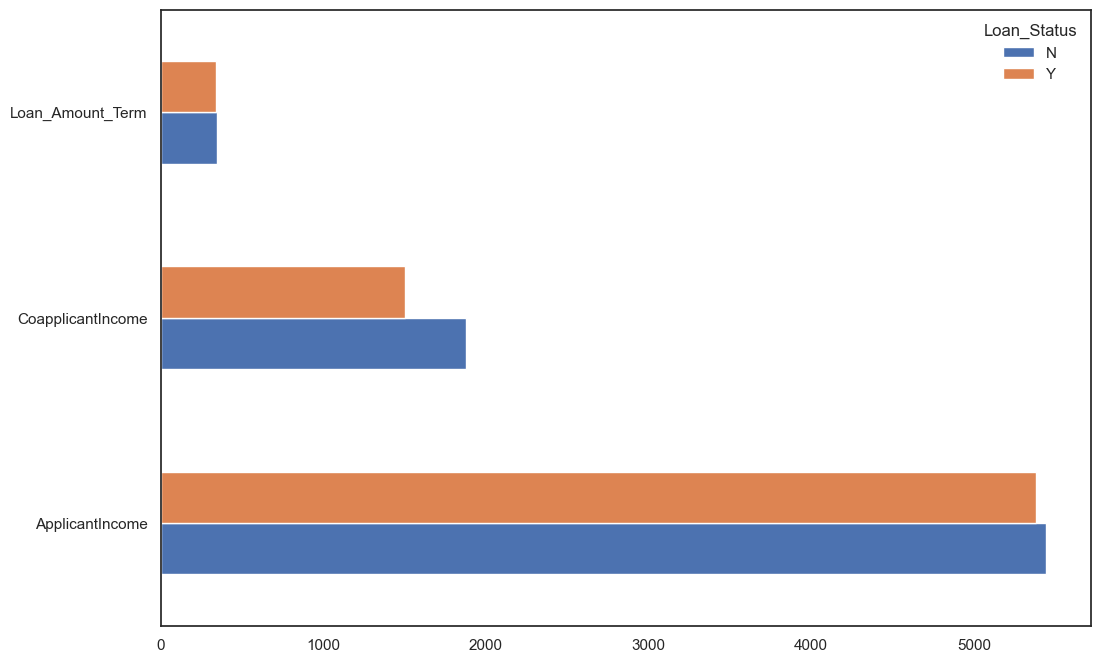

In [34]:
df.groupby('Loan_Status')[['ApplicantIncome' , 'CoapplicantIncome' , 'Loan_Amount_Term']].mean().T.plot(kind='barh' , figsize=(12,8))

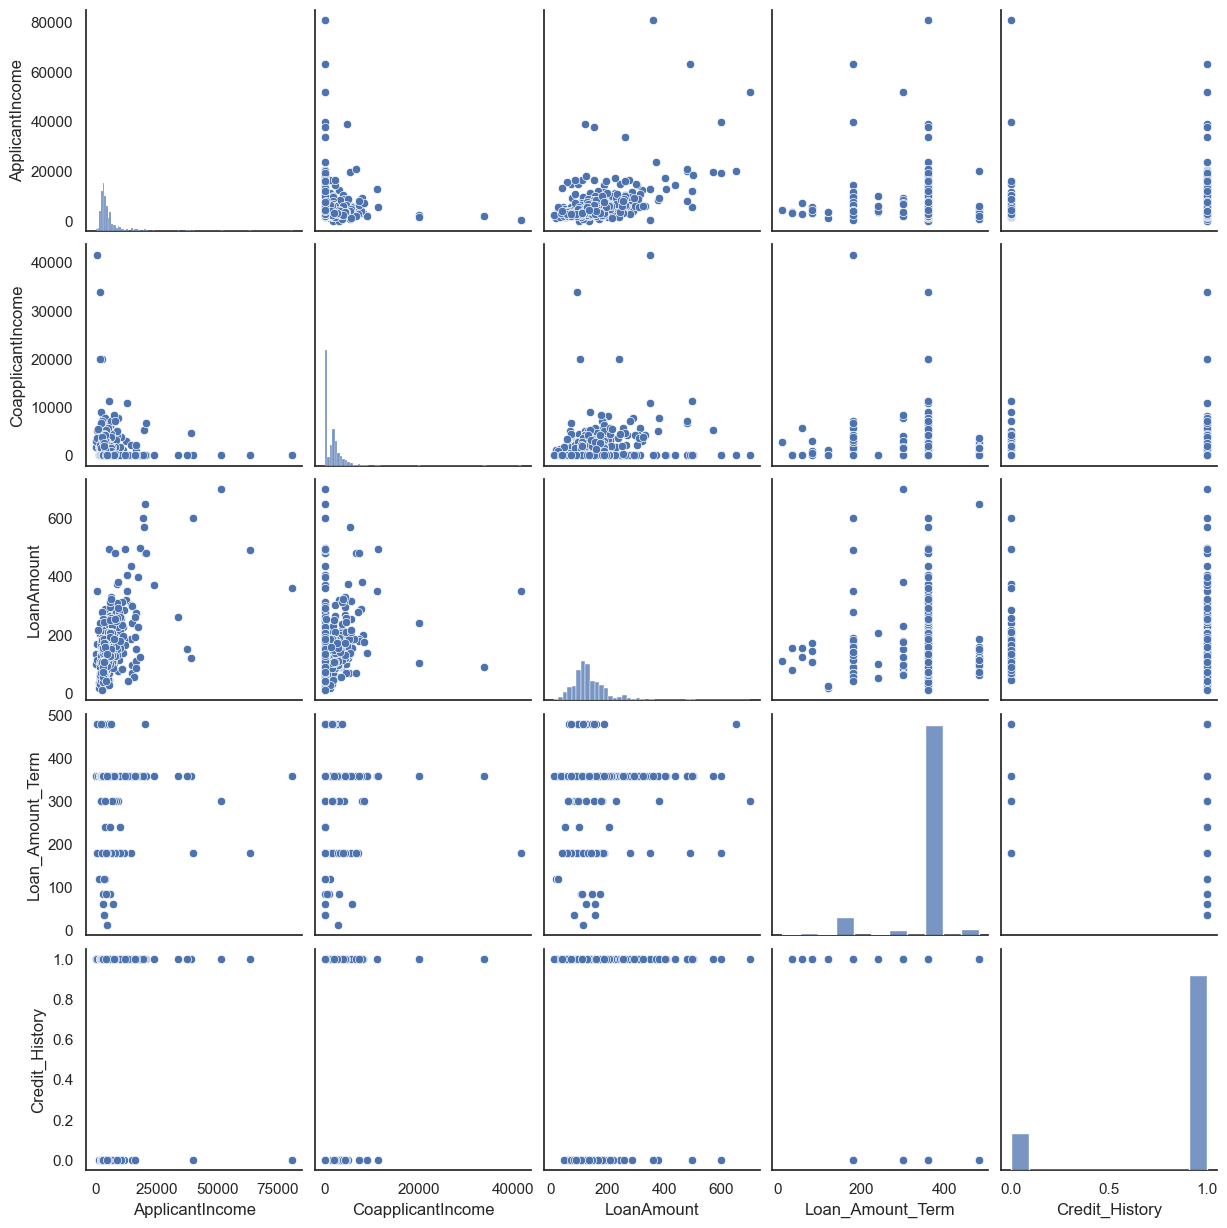

In [35]:
sns.pairplot(df)

In [36]:
df_data=df.drop(columns=['Loan_ID'])
categorical_columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
print(categorical_columns)
numerical_columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


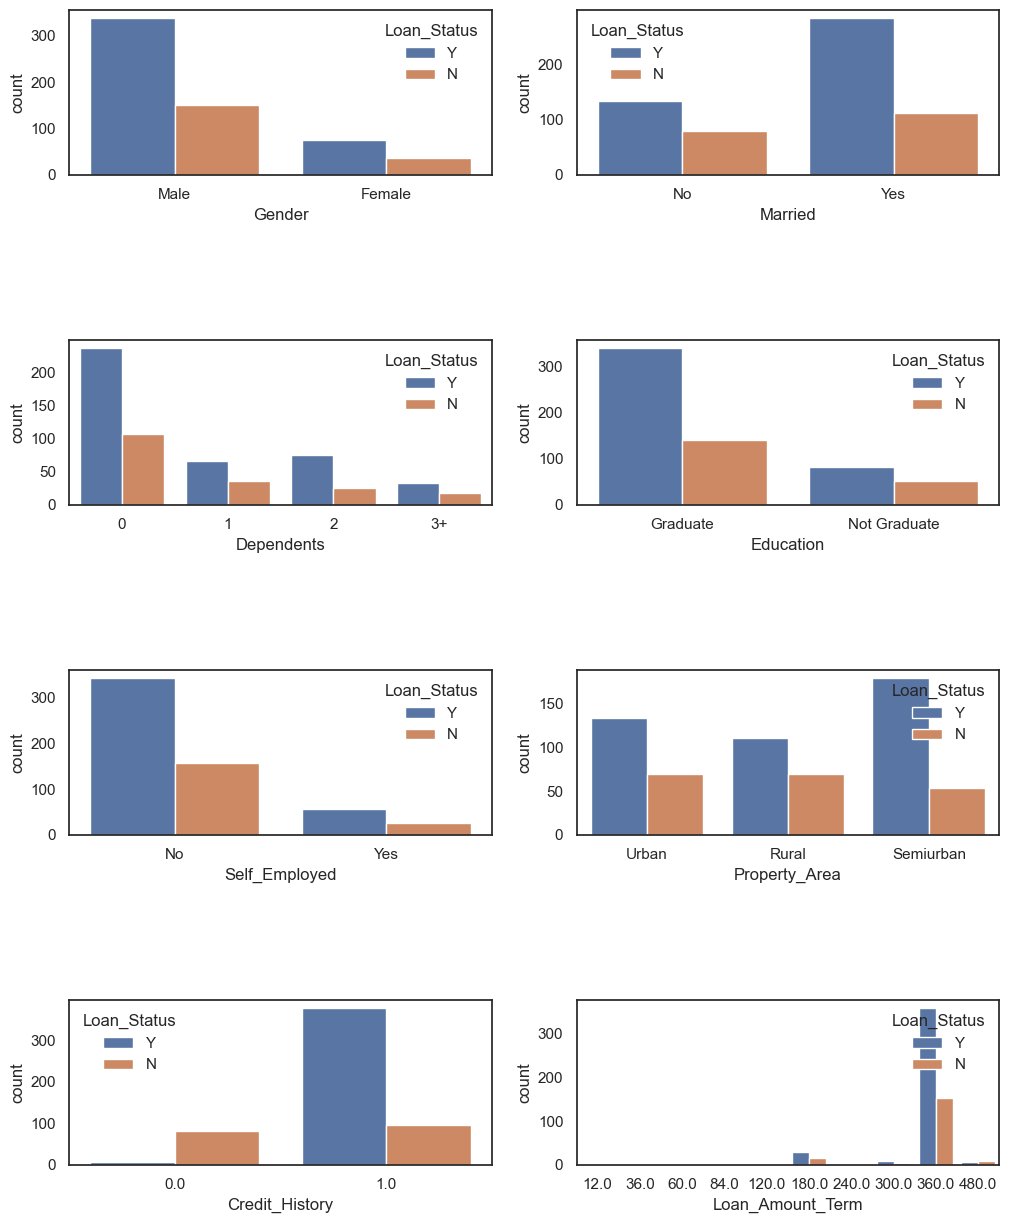

In [37]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000
       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000
       ApplicantIncome  Coap

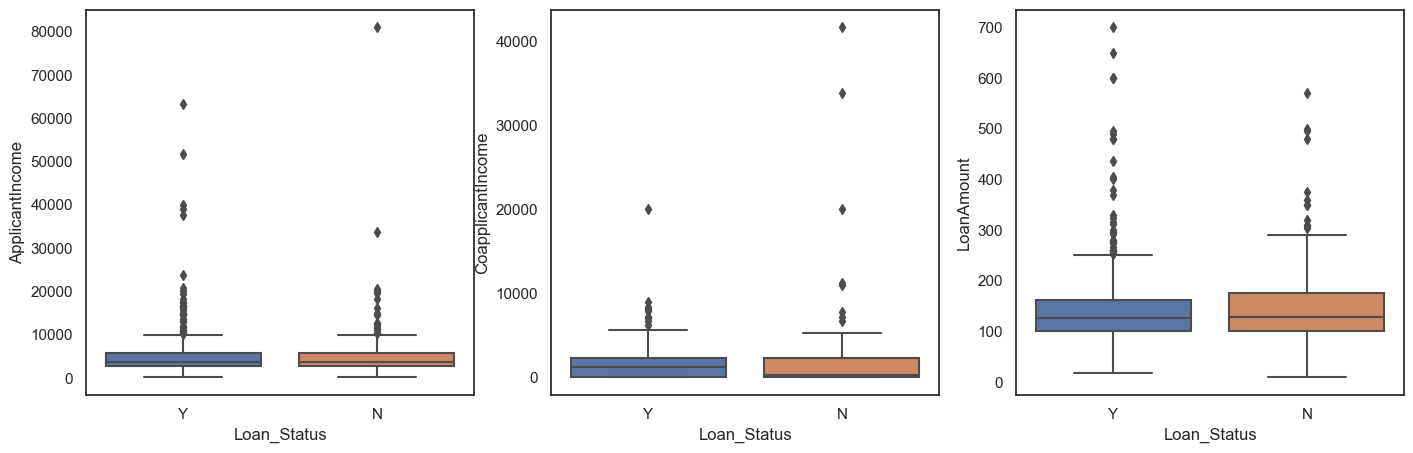

In [38]:
fig, axes=plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df_data, x='Loan_Status',ax=axes[idx])
    
    print(df_data[numerical_columns].describe())
    plt.subplots_adjust(hspace=1)

In [39]:
### Encoding  categorical Features:####
loan_data_encoded=pd.get_dummies(df_data,drop_first=True)
loan_data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


<AxesSubplot:ylabel='None'>

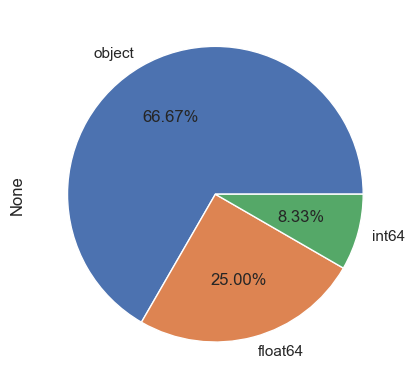

In [40]:
x_data.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

In [41]:
obj_col=x_data.select_dtypes(include='object').columns
int_col=x_data.select_dtypes(include='int').columns
flt_col=x_data.select_dtypes(include='float').columns

In [42]:
le=LabelEncoder()

In [43]:
for obj in obj_col:
    x_data[obj] = le.fit_transform(x_data[obj].astype(str))

In [44]:
for nt in int_col:
    x_data[nt] = le.fit_transform(x_data[nt].astype(int))

In [45]:
for flt in flt_col:
    x_data[flt] = le.fit_transform(x_data[flt].astype(float))

In [46]:
x_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,8,1,2,1
1,1,1,1,1,0,0,306,60,8,1,0,0
2,2,1,1,0,0,1,139,0,8,1,2,1
3,3,1,1,0,1,0,90,160,8,1,2,1
4,4,1,0,0,0,0,381,0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,8,1,0,1
610,610,1,1,3,0,0,275,0,5,1,0,1
611,611,1,1,1,0,0,431,3,8,1,2,1
612,612,1,1,2,0,0,422,0,8,1,2,1


<AxesSubplot:ylabel='None'>

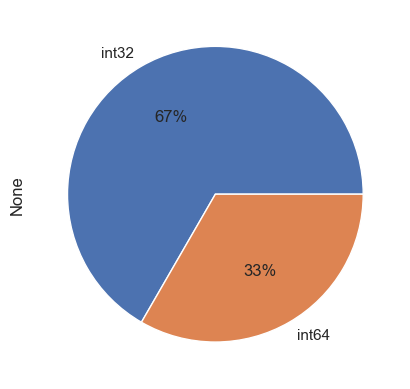

In [47]:
x_data.dtypes.value_counts().plot.pie(autopct='%2.0f%%')

In [48]:
x_data=x_data.dropna()
y_data=y_data.dropna()

In [49]:
x_data=x_data.drop([5,6,1,4,7])

<AxesSubplot:>

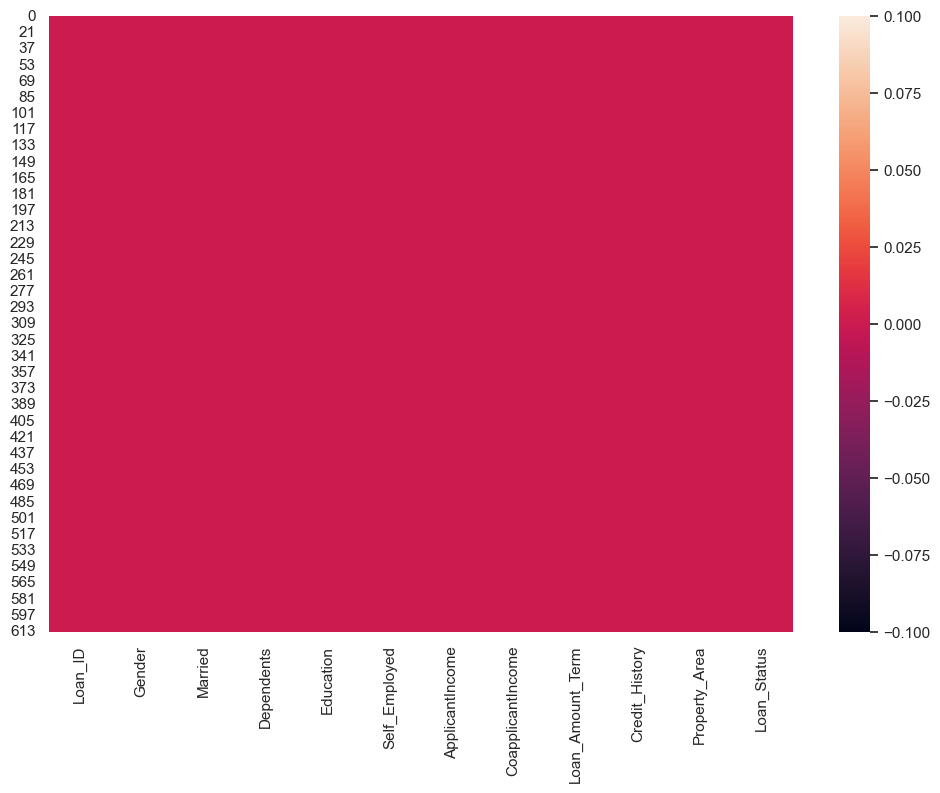

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(x_data.isnull())

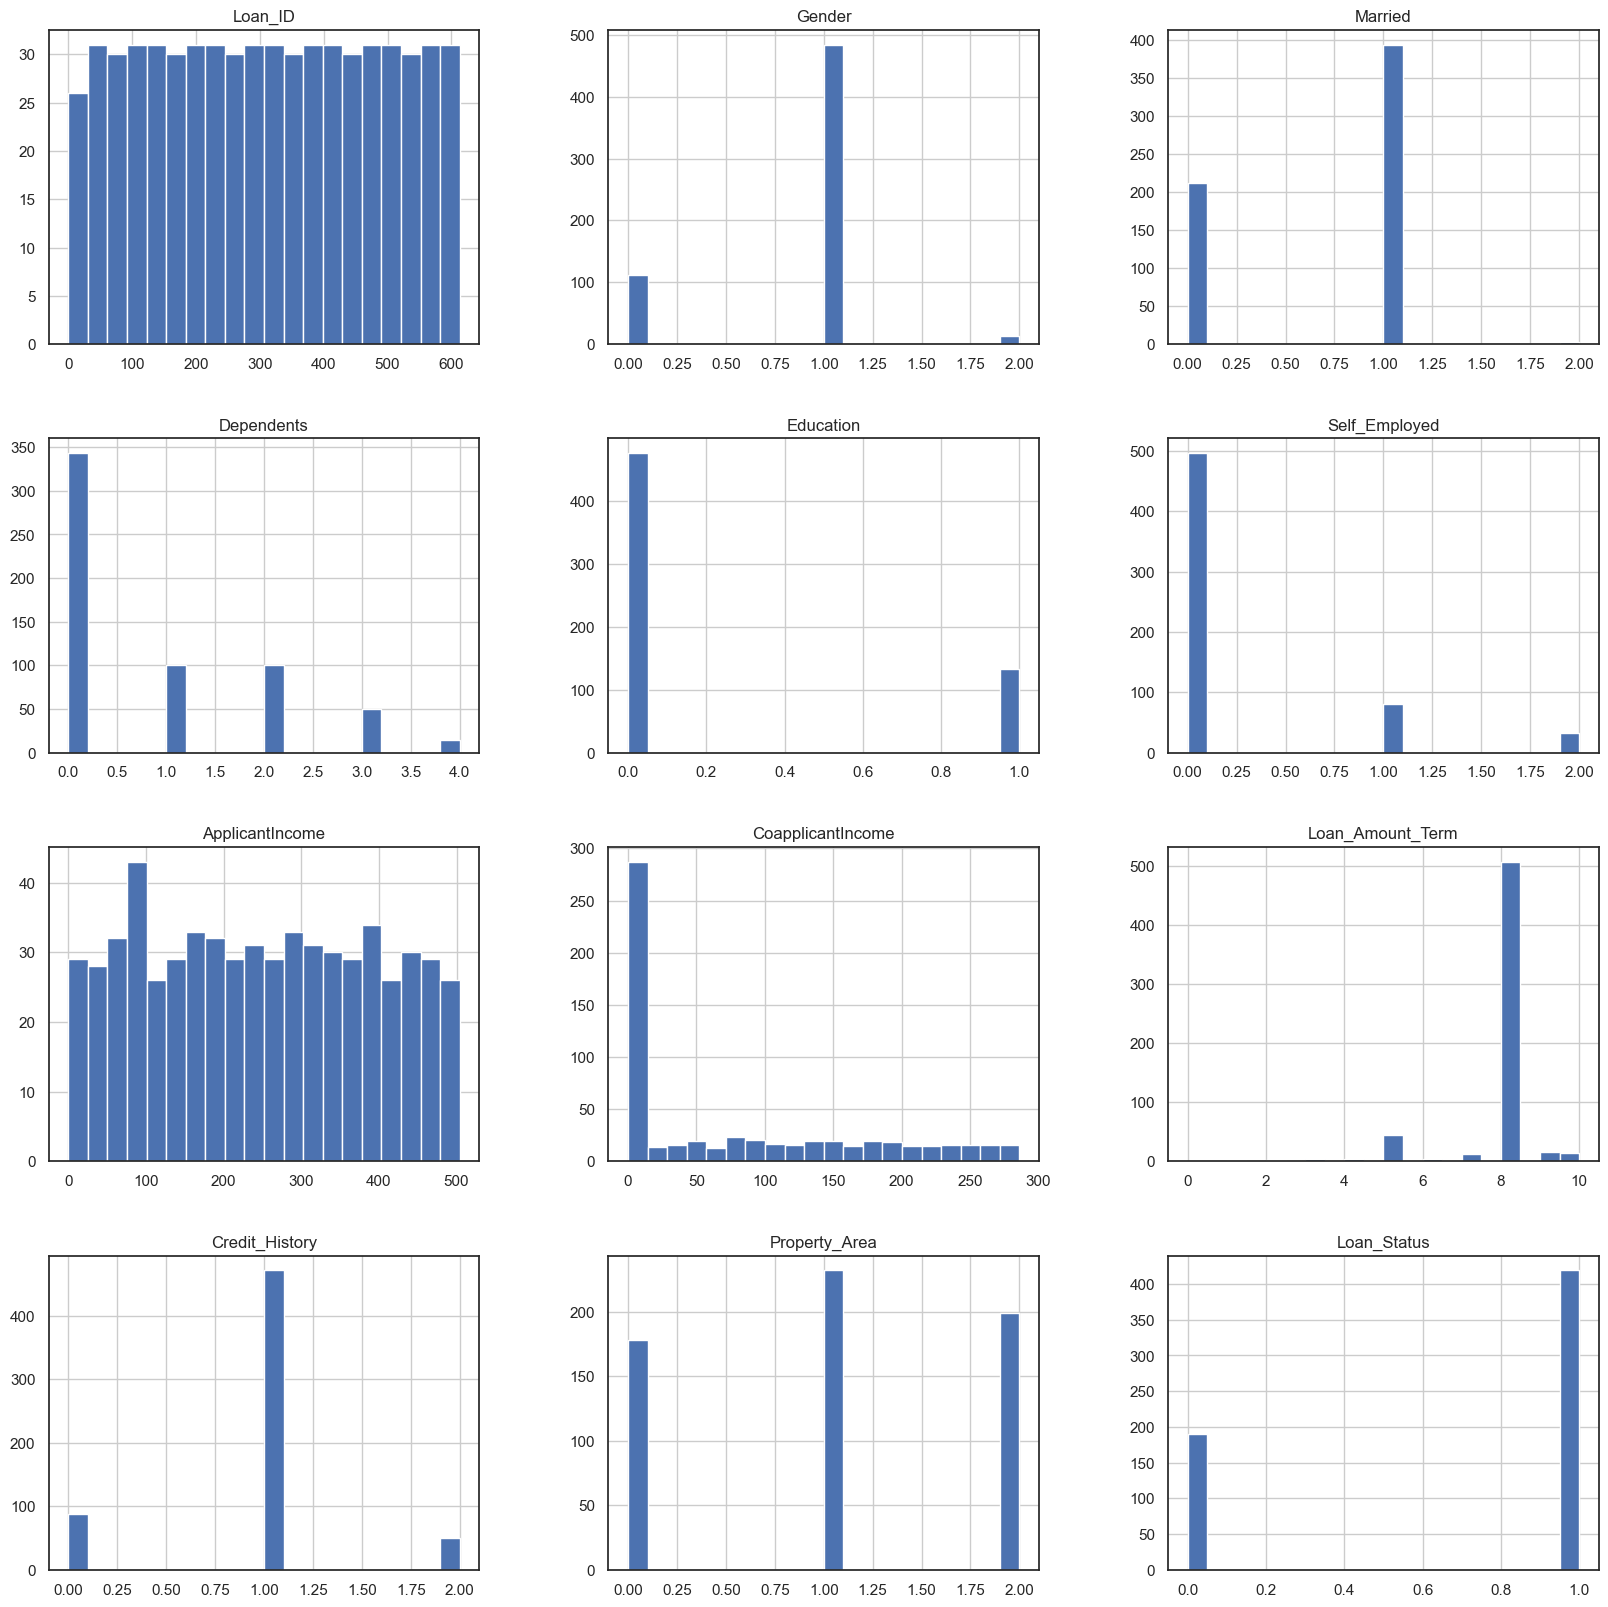

In [51]:
x_data.hist(figsize=(20,20),bins=20, legend=False)
plt.show()

In [52]:
x_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

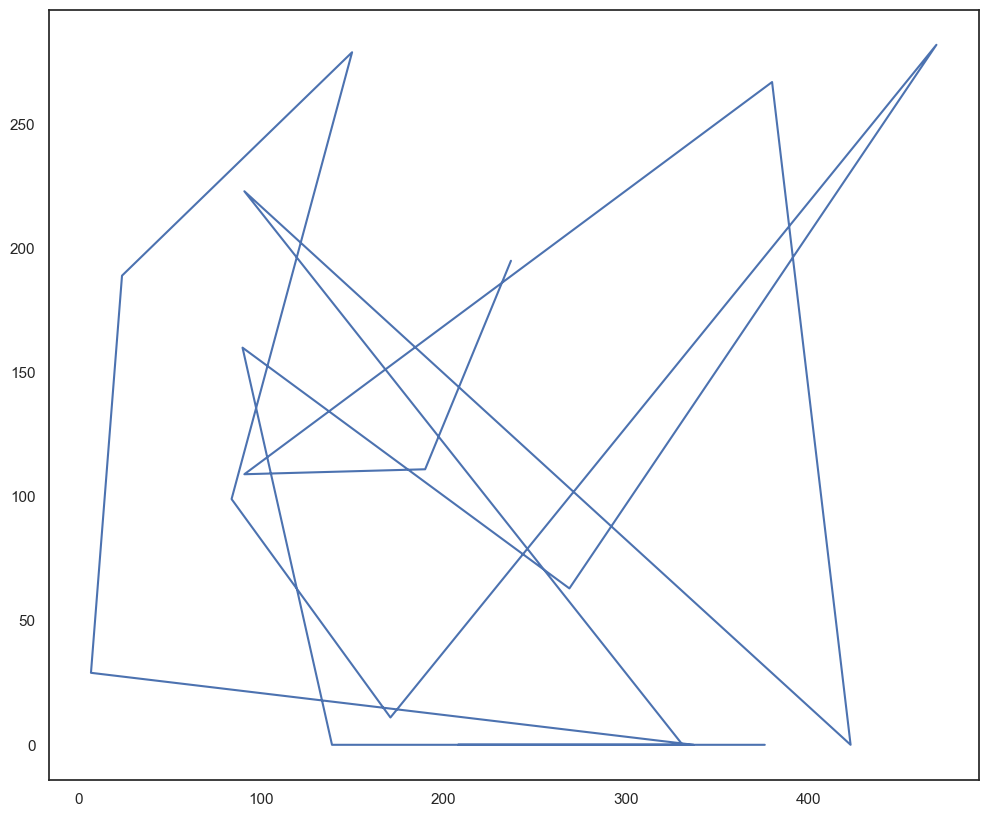

In [53]:
plt.figure(figsize=(12,10))
plt.plot(x_data['ApplicantIncome'][0:20], x_data['CoapplicantIncome'][0:20])
plt.show()

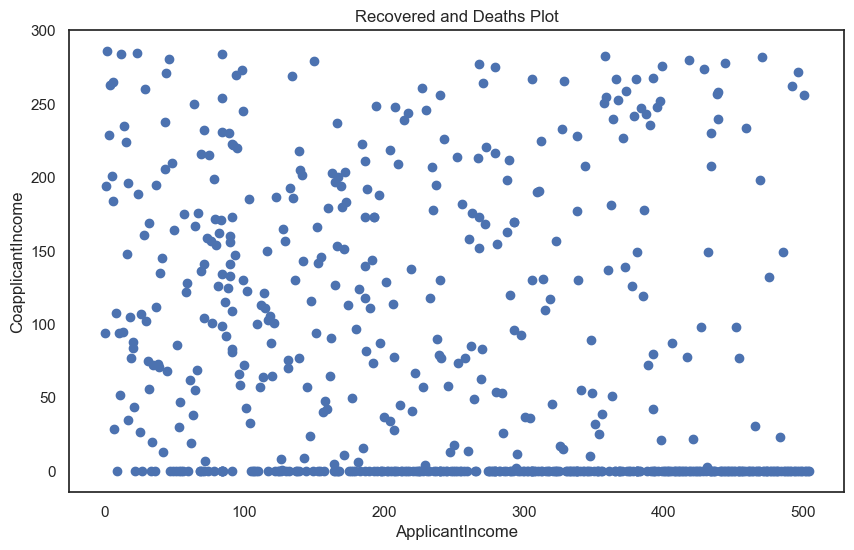

In [54]:
plt.figure(figsize=(10,6))
plt.plot(x_data['ApplicantIncome'], x_data['CoapplicantIncome'], 'o')
plt.title("Recovered and Deaths Plot")
plt.xlabel("ApplicantIncome")
plt.ylabel("CoapplicantIncome")
plt.show()

In [55]:
#### Split Features and Target Variable #####

X=loan_data_encoded.drop(columns='Loan_Status_Y')
y=loan_data_encoded['Loan_Status_Y']

#######Splitting into Train Test Data ##########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

########### Handling/Imputing Missing values ###########
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train=imp.fit(X_train)
X_train=imp_train.transform(X_train)
X_test_imp=imp_train.transform(X_test)

Model 1: DECISION TREE CLASSIFIER

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred=tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train, y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ", cross_val_score(tree_clf, X_train,y_train, cv=5, scoring='f1_macro').mean())
print("Validation Mean Accuracy: ", cross_val_score(tree_clf, X_train,y_train, cv=5, scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6392285382453347
Validation Mean Accuracy:  0.7086992372706659


training accuracy > test accuracy with default settings of decision tree classifier. Model is overfit.

Hyperparameter Tuning

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

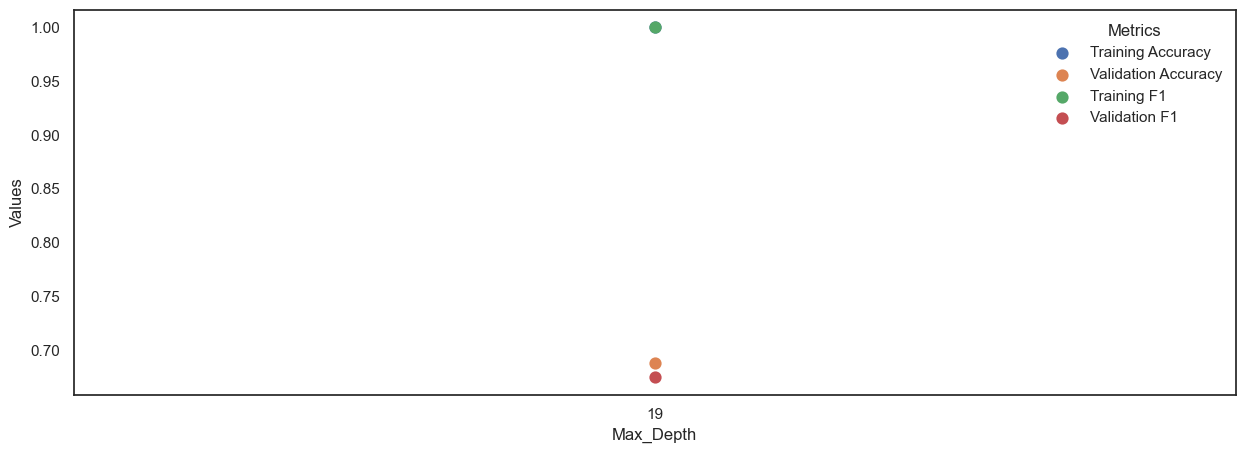

In [57]:
training_accuracy=[]
val_accuracy=[]
training_f1=[]
val_f1=[]
tree_depths=[]
for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred=tree_clf.predict(X_train)
    
training_acc= accuracy_score(y_train,y_training_pred)
train_f1 = f1_score(y_train,y_training_pred)
val_mean_f1 = cross_val_score(tree_clf, X_train, y_train,cv=5, scoring='f1_macro').mean()
val_mean_accuracy=cross_val_score(tree_clf,X_train,y_train,cv=5, scoring='accuracy').mean()

training_accuracy.append(training_acc)
val_accuracy.append(val_mean_accuracy)
training_f1.append(train_f1)
val_f1.append(val_mean_f1)
tree_depths.append(depth)

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy" : val_accuracy, "Training F1" : training_f1, "Validation F1": val_f1, "Max_Depth": tree_depths}
Tuning_Max_depth_df=pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df=Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name="Values")
fig,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

Max_Depth = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy~0.805; Optimum F1 Score:~0.7

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

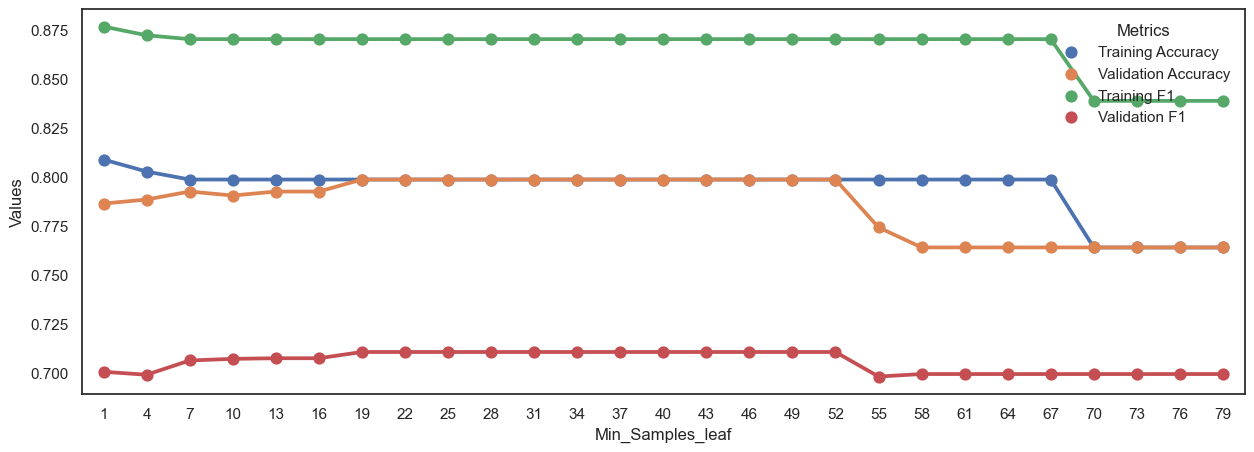

In [58]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)


Min_Samples_leaf to 35 to improve test accuracy. 

In [59]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


This Decision Tree Classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix results into mis-classification can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as ACCEPT.

Building the Model

In [60]:
df=df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [61]:
X_train=df['LoanAmount']
X_test=df['Loan_Amount_Term']
y=df.Loan_Status

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X_train,y,test_size=0.3,random_state=42)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n====================Train Result=====================")

print("Accuracy Score: ",accuracy_score(y_train,pred)*100 )

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"Cofusion Matrix:  \n {confusion_matrix(y_train, pred)}\n")

#****************************Test score********************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("\n==================Test Result==========================")
print("Accuracy: ", accuracy_score(y_test,pred) * 100)
print("_____________________________________________")
print(f"CLASSIFICATION REPORT :\n{clf_report}")
print("______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



====================Train Result=====================
Accuracy Score:  75.59523809523809
__________________________________________________
CLASSIFICATION REPORT : 
                    N           Y  accuracy   macro avg  weighted avg
precision    0.923077    0.741935  0.755952    0.832506      0.798003
recall       0.230769    0.991379  0.755952    0.611074      0.755952
f1-score     0.369231    0.848708  0.755952    0.608970      0.700299
support    104.000000  232.000000  0.755952  336.000000    336.000000
___________________________________________________
Cofusion Matrix:  
 [[ 24  80]
 [  2 230]]


==================Test Result==========================
Accuracy:  70.13888888888889
_____________________________________________
CLASSIFICATION REPORT :
                   N           Y  accuracy   macro avg  weighted avg
precision   0.533333    0.720930  0.701389    0.627132      0.663609
recall      0.181818    0.930000  0.701389    0.555909      0.701389
f1-score    0.271186    0

In [65]:
from sklearn.model_selection import GridSearchCV
grid_param={'max_depth' : range(4,8),'min_samples_split' : range(2,8,2),'learning_rate' : np.arange(0.1,0.3)}

In [66]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [67]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2}

In [68]:
gbdt_clf = GradientBoostingClassifier(
        max_depth=4, min_samples_split=4, learning_rate=0.1)

gbdt_clf.fit(X_train,y_train)

pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n===================Train Result=====================")

print("Accuracy Score: " ,accuracy_score(y_train, pred)*100)

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"CLASSIFICATION REPORT : \n{clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n")

#****************************Test score*************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n===================TestResult======================")
print("Accuracy Score:", accuracy_score(y_test,pred) * 100)
print("_________________________________________________")
print(f"CLASSIFICATION REPORT : \n{clf_report}")
print("__________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


===================Train Result=====================
Accuracy Score:  79.76190476190477
__________________________________________________
CLASSIFICATION REPORT : 
                    N           Y  accuracy   macro avg  weighted avg
precision    0.833333    0.790780  0.797619    0.812057      0.803951
recall       0.432692    0.961207  0.797619    0.696950      0.797619
f1-score     0.569620    0.867704  0.797619    0.718662      0.775440
support    104.000000  232.000000  0.797619  336.000000    336.000000
___________________________________________________
CLASSIFICATION REPORT : 
                   N           Y  accuracy   macro avg  weighted avg
precision   0.533333    0.720930  0.701389    0.627132      0.663609
recall      0.181818    0.930000  0.701389    0.555909      0.701389
f1-score    0.271186    0.812227  0.701389    0.541707      0.646909
support    44.000000  100.000000  0.701389  144.000000    144.000000
____________________________________________________
Confusion 

In [69]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
X = df['Loan_Amount_Term']
y = df['LoanAmount']

In [70]:
y

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 480, dtype: float64

In [71]:
reg=LinearRegression()
reg=reg.fit(X.values.reshape(-1,1),y)
predictions=reg.predict(X.values.reshape(-1,1))

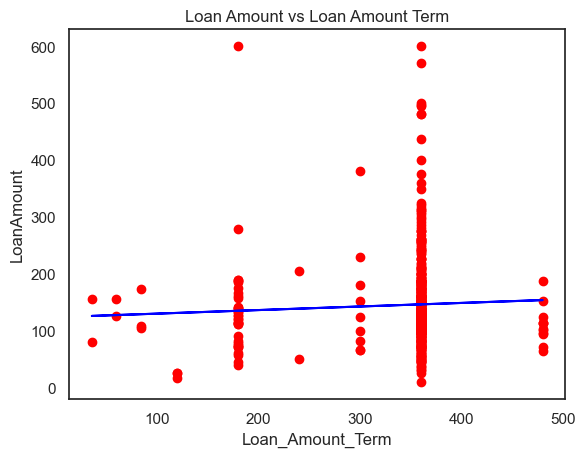

In [72]:
plot.scatter(X,y,color='red')
plot.plot(X,predictions,color='blue')
plot.title('Loan Amount vs Loan Amount Term')
plot.xlabel('Loan_Amount_Term')
plot.ylabel('LoanAmount')
plot.show()

In [73]:
from sklearn.metrics import r2_score
r2_score(y,predictions)

0.0025874265313400313

In [75]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred=randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is ', score_randomforest)

The accuracy of the Random Forest Model is  0.6319444444444444


In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred=knn.predict(X_test)
score_knn=knn.score(X_test,y_test)
print('The accuracy of the KNN Model is' , score_knn)

The accuracy of the KNN Model is 0.6180555555555556


In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the LogisticRegression is', score_logreg)

The accuracy of the LogisticRegression is 0.6944444444444444


In [78]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_svc=svc.score(X_test, y_test)
print('The accuarcy of SVC is', score_svc)

The accuarcy of SVC is 0.6458333333333334


the most accurate model is Logistic Regression

#### Conclusion

I first use eda to show an approach of analyzing data sets, then use a machine learning model to use the trained model of prediction. Any model can be made much more precise and accurate for predictions, by very large dataset to get a accurate and realistic score. The most accurate model is Logistic Regression. 
My accuracy score was 79.7%

#### Thank you